## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('insurance.csv')
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [3]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [5]:
df.shape

(1340, 10)

In [6]:
pd.set_option("display.float_format","{:.2f}".format)

In [7]:
sns.set(style='whitegrid',palette='Set2',font_scale=1.1)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [10]:
df.isna().sum().sum()

np.int64(8)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(1332, 10)

In [13]:
df.isna().sum().sum()

np.int64(0)

In [14]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


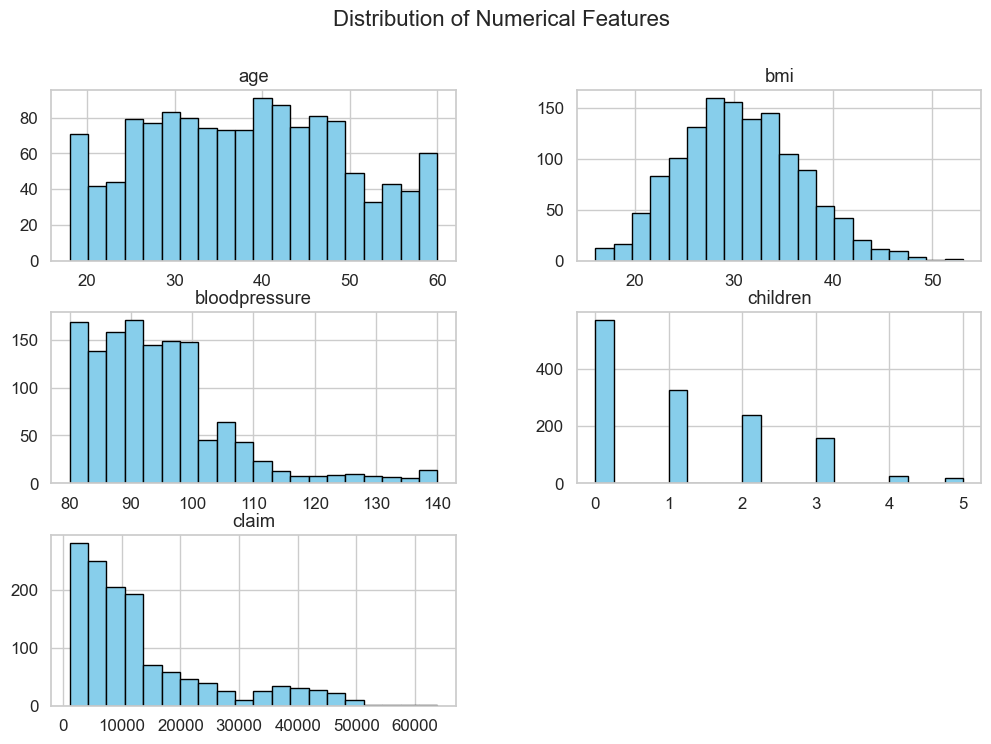

In [15]:
numeric_cols = ['age','bmi','bloodpressure','children','claim']
df[numeric_cols].hist(bins=20,figsize=(12,8),color='skyblue',edgecolor='black')
plt.suptitle("Distribution of Numerical Features",fontsize=16)
plt.show()

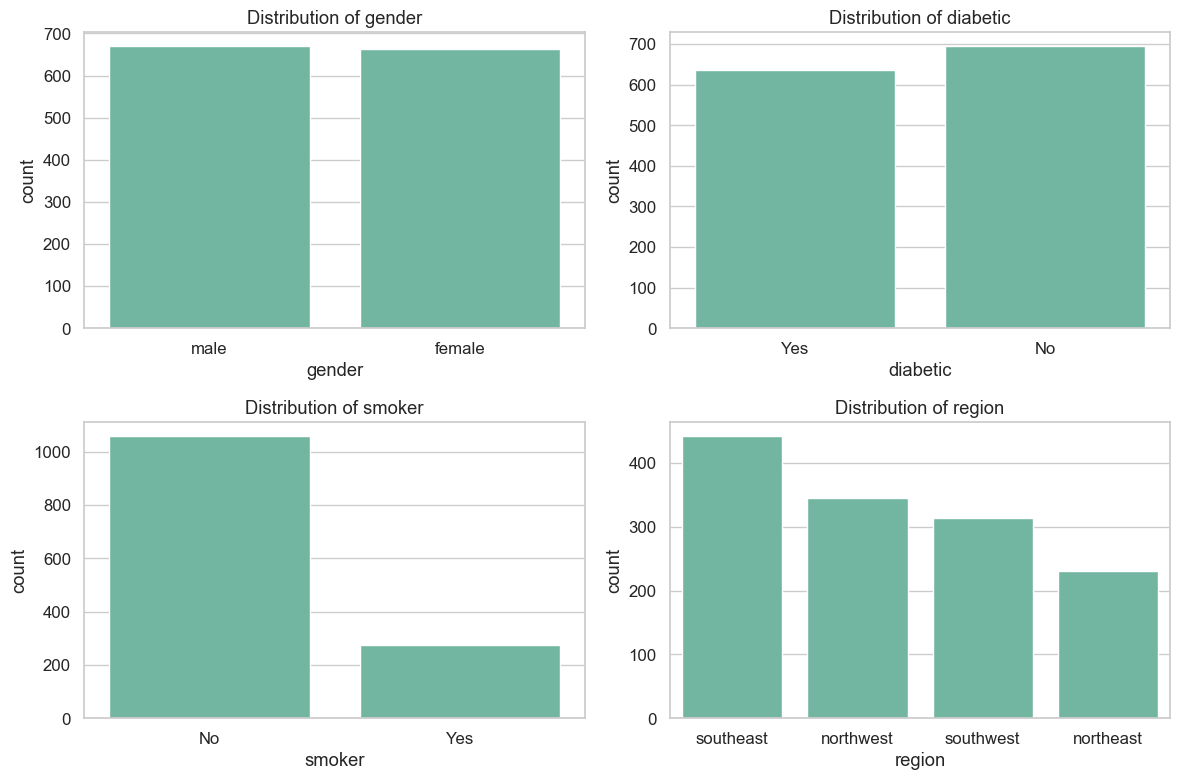

In [16]:
cat_cols = ['gender','diabetic','smoker','region']

plt.figure(figsize=(12,8))

for i,col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [17]:
df.groupby(['gender','smoker'])['claim'].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

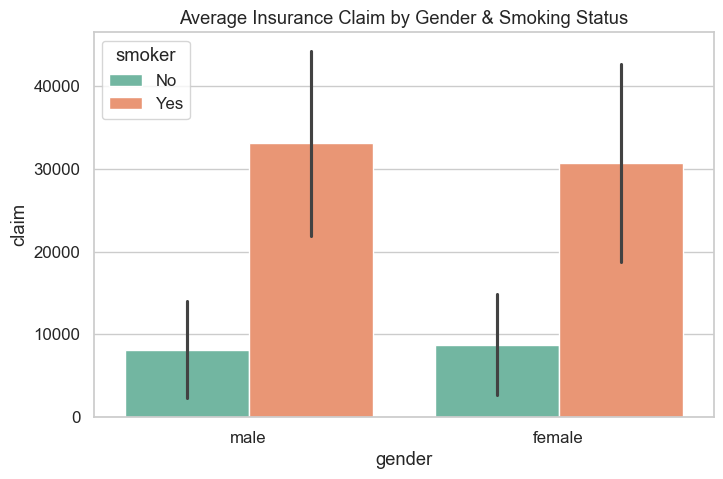

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='gender',y='claim',hue='smoker',estimator='mean',errorbar='sd')
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()

In [19]:
plot_region_diabetic = df.groupby(['region','diabetic'])['claim'].mean().unstack()

In [20]:
plot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


Text(0, 0.5, 'Mean Claim')

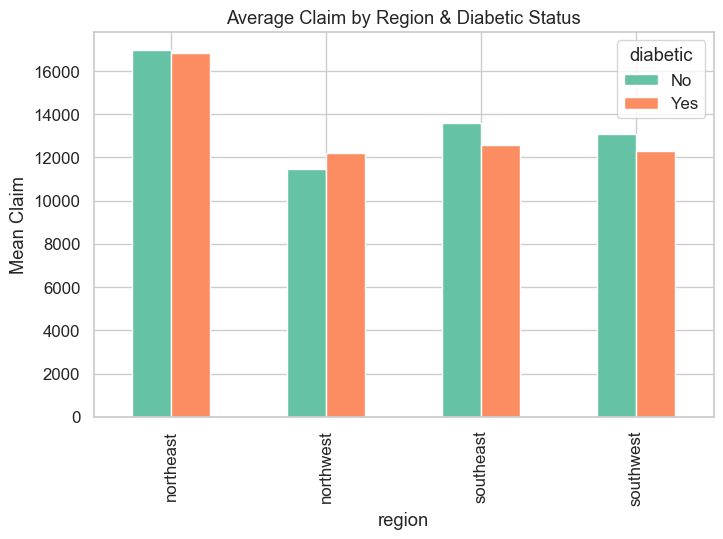

In [21]:
plot_region_diabetic.plot(kind='bar',figsize=(8,5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")

In [22]:
pivot_table = pd.pivot_table(df,values='claim',index='region',columns='smoker',aggfunc='mean')
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [23]:
pivot_table = pd.pivot_table(df,values='claim',index='children',columns='diabetic',aggfunc='mean')
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [24]:
numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

Text(0.5, 1.0, 'Correlation Heatmap')

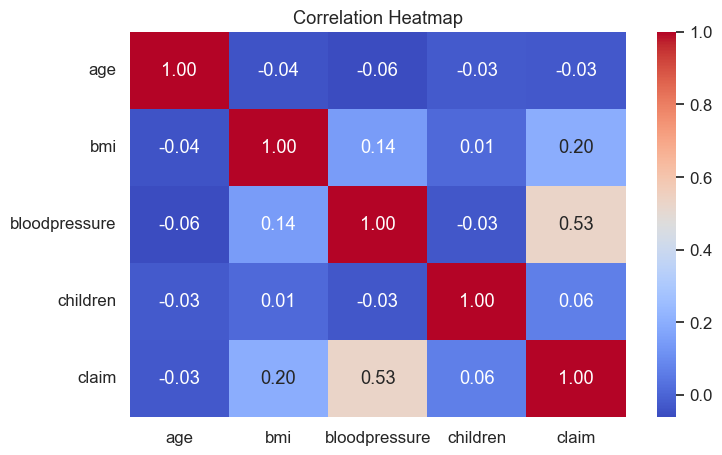

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Claim Vs Age by Smoker & Age')

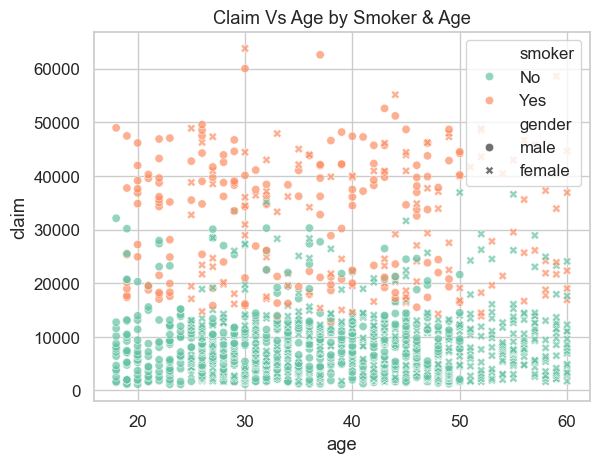

In [26]:
sns.scatterplot(data=df,x='age',y='claim',hue='smoker',style='gender',alpha=0.7)
plt.title("Claim Vs Age by Smoker & Age")

Text(0.5, 1.0, 'Relationship between BMI and Claim Amount')

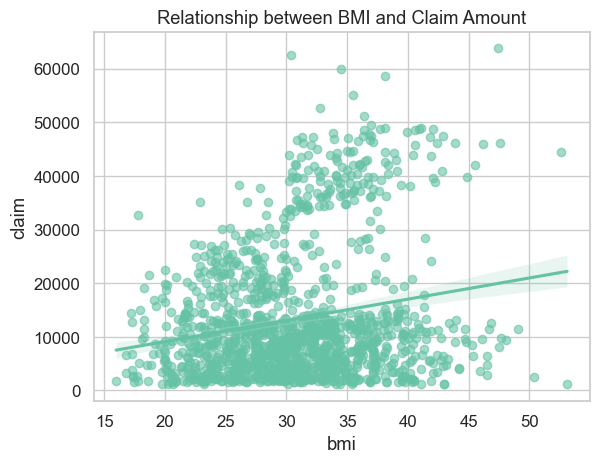

In [27]:
sns.regplot(data=df,x='bmi',y='claim',scatter_kws={'alpha':0.6})
plt.title("Relationship between BMI and Claim Amount")

Text(0.5, 1.0, 'Claim Distribution by Number of Children')

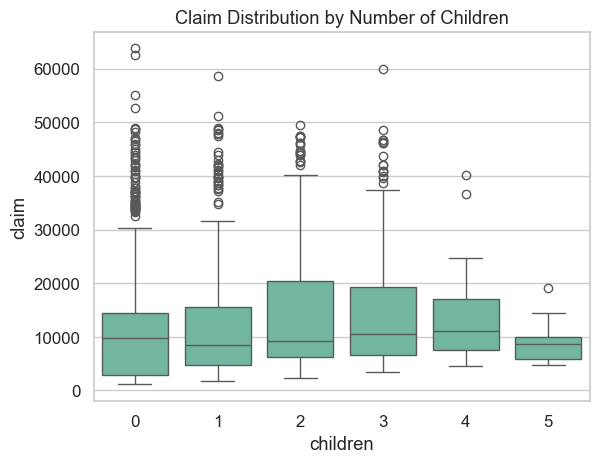

In [28]:
sns.boxplot(data=df,x='children',y='claim')
plt.title("Claim Distribution by Number of Children")

In [29]:
df['age_group'] = pd.cut(df['age'],bins=[0,18,30,45,60,100],labels={'<18','18-30','31-45','46-60','60+'})

In [30]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87,<18
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51,31-45
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80,31-45
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40,31-45
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46,31-45
...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40,<18
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07,18-30
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40,31-45
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87,<18


In [31]:
df['age_group'].value_counts()

age_group
<18      553
18-30    383
31-45    380
46-60     16
60+        0
Name: count, dtype: int64

Text(0.5, 1.0, 'Average Claim by Age Group')

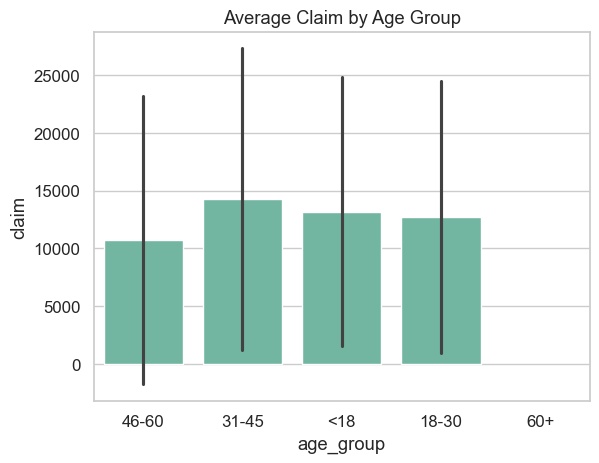

In [32]:
sns.barplot(data=df,x='age_group',y='claim',estimator='mean',errorbar='sd')
plt.title("Average Claim by Age Group")

In [33]:
df['bmi_category'] = pd.cut(df['bmi'],bins=[0,18.5,24.9,29.9,100],labels={"Underweight","Normal","Overweight","Obese"})

In [34]:
df['bmi_category'].value_counts()

bmi_category
Normal         702
Obese          387
Underweight    222
Overweight      21
Name: count, dtype: int64

In [35]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Claim Distribution by BMI Category')

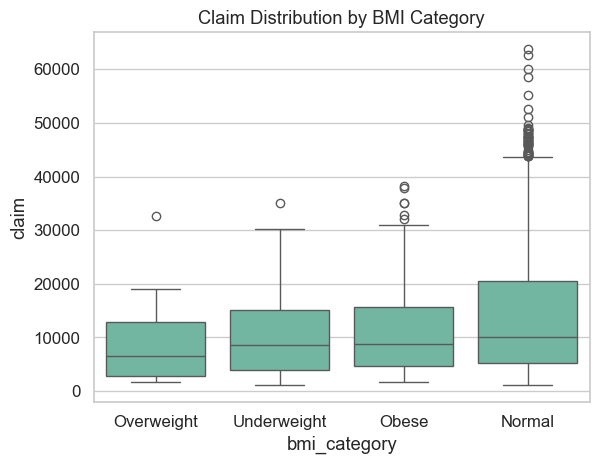

In [36]:
sns.boxplot(data=df,x='bmi_category',y='claim')
plt.title("Claim Distribution by BMI Category")

In [37]:
region_stats = df.groupby("region").agg(
    smoker_rate = ('smoker', lambda x: (x == "Yes").mean() * 100),
    mean_claim = ('claim','mean')
).reset_index()

In [38]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


Text(0.5, 1.0, 'Smoker Rate and Average Claim by Region')

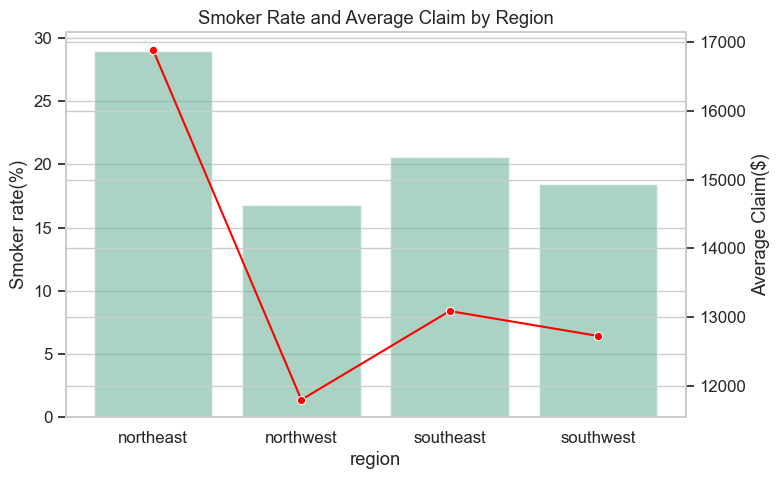

In [39]:
fig,ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data=region_stats,x='region',y='smoker_rate',ax=ax1,alpha=0.6)
ax2 = ax1.twinx()
sns.lineplot(data=region_stats,x='region',y='mean_claim',ax=ax2,color='red',marker='o')

ax1.set_ylabel("Smoker rate(%)")
ax2.set_ylabel("Average Claim($)")
plt.title("Smoker Rate and Average Claim by Region")

## Data Preprocessing

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import joblib

In [41]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [42]:
X = df[['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children','smoker']]
y = df['claim']

In [43]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,male,23.20,91,Yes,0,No
1,24.00,male,30.10,87,No,0,No
7,19.00,male,41.10,100,No,0,No
8,20.00,male,43.00,86,No,0,No
9,30.00,male,53.10,97,No,0,No
...,...,...,...,...,...,...,...
1335,44.00,female,35.50,88,Yes,0,Yes
1336,59.00,female,38.10,120,No,1,Yes
1337,30.00,male,34.50,91,Yes,3,Yes
1338,37.00,male,30.40,106,No,0,Yes


In [44]:
cat_cols = ['gender','diabetic','smoker']
label_encoder = {}

In [45]:
for col  in cat_cols:
    le  = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoder[col] = le

    joblib.dump(le,f'label_encoder_{col}.pkl')

In [46]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [47]:
label_encoder

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
scaler = StandardScaler()

In [50]:
num_cols = ['age','bmi','bloodpressure','children']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [51]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [52]:
print(X_train.shape,y_train.shape)

(1065, 7) (1065,)


In [53]:
print(X_test.shape,y_test.shape)

(267, 7) (267,)


In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from xgboost import XGBRegressor

In [55]:
def evalute_model(model,X_train,X_test,y_train,y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))

    return {"R2" : r2, "MAE" : mae, "RMSE" : rmse}

In [56]:
results = {}

In [57]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
results['Linear Regression'] = evalute_model(lr, X_train, X_test, y_train, y_test)
print("Linear Regression model trained")

# Polynomial Regression
best_poly_score = -np.inf
best_poly_model = None

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train)

    score = poly_lr.score(X_test_poly, y_test)

    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model
results[f'Polynomial Regression (degree={degree})'] = evalute_model(
    poly_lr, poly.fit_transform(X_train), poly.transform(X_test), y_train, y_test
)
print("Polynomial Regression models are trained")

# Random Forest
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
results['Random Forest'] = evalute_model(best_rf, X_train, X_test, y_train, y_test)
print("Random Forest training is completed, best parameters:", rf_grid.best_params_)

# SVR
svr = SVR()
svr_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 50],
    'epsilon': [0.1, 0.2, 0.5],
    'degree': [2, 3]
}
svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_
results["SVR"] = evalute_model(best_svr, X_train, X_test, y_train, y_test)
print("SVR training is completed, best parameters:", svr_grid.best_params_)

# XGBoost
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='r2', n_jobs=-1, verbose=2)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
results["XGBoost"] = evalute_model(best_xgb, X_train, X_test, y_train, y_test)
print("XGBoost training is completed, best parameters:", xgb_grid.best_params_)

Linear Regression model trained
Polynomial Regression models are trained
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Random Forest training is completed, best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 3 folds for each of 54 candidates, totalling 162 fits
SVR training is completed, best parameters: {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
Fitting 3 folds for each of 36 candidates, totalling 108 fits
XGBoost training is completed, best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [58]:
results

{'Linear Regression': {'R2': 0.6929631891682307,
  'MAE': 5230.217657410231,
  'RMSE': np.float64(6599.172999989216)},
 'Polynomial Regression (degree=2)': {'R2': 0.7942900935669737,
  'MAE': 4314.111795276484,
  'RMSE': np.float64(5401.5934480428705)},
 'Random Forest': {'R2': 0.8042728716862075,
  'MAE': 4051.2867483183436,
  'RMSE': np.float64(5268.89813854627)},
 'SVR': {'R2': 0.5747130001428693,
  'MAE': 5441.610027532178,
  'RMSE': np.float64(7766.678790056954)},
 'XGBoost': {'R2': 0.8142487713620561,
  'MAE': 4068.0834703446862,
  'RMSE': np.float64(5132.868498845465)}}

In [59]:
results_df = pd.DataFrame(results).T.sort_values(by='R2',ascending=False)
results_df

,R2,MAE,RMSE
XGBoost,0.81,4068.08,5132.87
Random Forest,0.80,4051.29,5268.90
Polynomial Regression (degree=2),0.79,4314.11,5401.59
Linear Regression,0.69,5230.22,6599.17
SVR,0.57,5441.61,7766.68


In [60]:
models = {
    "Linear Regression": lr,
    "Polynomial Regression": poly_lr,
    "Random Forest": best_rf,
    "SVR": best_svr,
    "XGBoost": best_xgb
}

In [61]:
best_r2 = results_df['R2'].max()

In [62]:
best_r2

np.float64(0.8142487713620561)

In [63]:
top_model = results_df[results_df["R2"] == best_r2]

In [64]:
top_model

,R2,MAE,RMSE
XGBoost,0.81,4068.08,5132.87


In [65]:
best_model_name = top_model.index[0]

In [66]:
best_model = models[best_model_name]

In [67]:
best_model

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [68]:
joblib.dump(best_model,'best_model.pkl')
print(f"Best model selected: {top_model.index[0]}")

Best model selected: XGBoost
